<a href="https://colab.research.google.com/github/AmaroRegly/trend_project/blob/main/Trend_Project_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction
The idea of this project is to show an analysis of Trend (fictitious store) sales in 2021. It is a clothing and accessories store whose main area of activity is in Australia.

#Analysis Objective
Provide Trend's marketing team with insights that can help direct the area's efforts and investments to attract new customers. In other words, providing knowledge that helps optimize all marketing actions..

#About the data
The analyzed data was obtained through the website [Kaggle](https://www.kaggle.com/datasets/ruchi798/shopping-cart-database/data) and is structured in 4 tables:


* **customers:** with general information about customers
* **orders:** with order payment data
* **products:** with the specifications of each product
* **sales:** with price and quantity data for each sale



##Import of libraries and datasets

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
customer_df = pd.read_csv('/content/drive/MyDrive/Data Analyst/Vendas/customers.csv')
orders_df = pd.read_csv('/content/drive/MyDrive/Data Analyst/Vendas/orders.csv')
product_df = pd.read_csv('/content/drive/MyDrive/Data Analyst/Vendas/products.csv')
sales_df = pd.read_csv('/content/drive/MyDrive/Data Analyst/Vendas/sales.csv')

##Overview of Data Cleaning

In [35]:
customer_df.info() #view dataframe information
customer_df[customer_df.duplicated()] #identify duplicate data in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1000 non-null   int64 
 1   customer_name  1000 non-null   object
 2   gender         1000 non-null   object
 3   age            1000 non-null   int64 
 4   home_address   1000 non-null   object
 5   zip_code       1000 non-null   int64 
 6   city           1000 non-null   object
 7   state          1000 non-null   object
 8   country        1000 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country


In [36]:
orders_df.info() #view dataframe information
orders_df[orders_df.duplicated()] #identify duplicate data in the dataframe
orders_df['delivery_date'] = pd.to_datetime(orders_df['delivery_date']) #convert column type from object to datetime
orders_df['order_date'] = pd.to_datetime(orders_df['order_date']) #convert column type from object to datetime
orders_df.info() #view dataframe information after changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1000 non-null   int64 
 1   customer_id    1000 non-null   int64 
 2   payment        1000 non-null   int64 
 3   order_date     1000 non-null   object
 4   delivery_date  1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1000 non-null   int64         
 1   customer_id    1000 non-null   int64         
 2   payment        1000 non-null   int64         
 3   order_date     1000 non-null   datetime64[ns]
 4   delivery_date  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(3)
memory usage: 39.2 KB


In [37]:
product_df.info() #view dataframe information
product_df[product_df.duplicated()] #identify duplicate data in the dataframe
product_df.rename(columns={'product_ID' : 'product_id'}, inplace=True) #Normalization of column name from product_ID to product_id
product_df.rename(columns={'quantity' : 'stock'}, inplace=True) #Normalization of column name from quantity to stock because others table using the same column name
product_df['price'] = product_df['price'].astype(float) #because it is a monetary value, we convert the type from int to float
product_df.info() #view dataframe information after changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_ID    1260 non-null   int64 
 1   product_type  1260 non-null   object
 2   product_name  1260 non-null   object
 3   size          1260 non-null   object
 4   colour        1260 non-null   object
 5   price         1260 non-null   int64 
 6   quantity      1260 non-null   int64 
 7   description   1260 non-null   object
dtypes: int64(3), object(5)
memory usage: 78.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    1260 non-null   int64  
 1   product_type  1260 non-null   object 
 2   product_name  1260 non-null   object 
 3   size          1260 non-null   object 
 4   colour        1260 non-null   object 
 5   price      

In [38]:
sales_df.info() #view dataframe information
sales_df[sales_df.duplicated()] #identify duplicate data in the dataframe
for atributo in ['price_per_unit', 'total_price']: sales_df[atributo] = sales_df[atributo].astype(float) #because it is a monetary value, we convert the type from int to float
sales_df.info() #view dataframe information after changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   sales_id        5000 non-null   int64
 1   order_id        5000 non-null   int64
 2   product_id      5000 non-null   int64
 3   price_per_unit  5000 non-null   int64
 4   quantity        5000 non-null   int64
 5   total_price     5000 non-null   int64
dtypes: int64(6)
memory usage: 234.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sales_id        5000 non-null   int64  
 1   order_id        5000 non-null   int64  
 2   product_id      5000 non-null   int64  
 3   price_per_unit  5000 non-null   float64
 4   quantity        5000 non-null   int64  
 5   total_price     5000 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 2

## Data Fusion

In [39]:
general_df = sales_df.merge(product_df, how='inner', left_on='product_id', right_on='product_id')
general_df = general_df.merge(orders_df, how='inner', left_on='order_id', right_on='order_id')
general_df = general_df.merge(customer_df, how='inner', left_on='customer_id', right_on='customer_id')


In [40]:
general_df.info()
general_df[general_df.duplicated()]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   sales_id        5000 non-null   int64         
 1   order_id        5000 non-null   int64         
 2   product_id      5000 non-null   int64         
 3   price_per_unit  5000 non-null   float64       
 4   quantity        5000 non-null   int64         
 5   total_price     5000 non-null   float64       
 6   product_type    5000 non-null   object        
 7   product_name    5000 non-null   object        
 8   size            5000 non-null   object        
 9   colour          5000 non-null   object        
 10  price           5000 non-null   float64       
 11  stock           5000 non-null   int64         
 12  description     5000 non-null   object        
 13  customer_id     5000 non-null   int64         
 14  payment         5000 non-null   int64         
 15  orde

,sales_id,order_id,product_id,price_per_unit,quantity,total_price,product_type,product_name,size,colour,...,order_date,delivery_date,customer_name,gender,age,home_address,zip_code,city,state,country


#Data exploration

##What is the overall sales performance throughout 2021?

In [41]:
total_sales = general_df['total_price'].sum()
print(f'Total revenue in 2021 was ${total_sales}')

Total revenue in 2021 was $1031800.0


##What is the average ticket in 2021?



In [42]:
avg_ticket = (general_df['total_price'].sum()) / (general_df['quantity'].sum())
print(f'The average ticket in 2021 was ${avg_ticket:.2f}')

The average ticket in 2021 was $103.57


##How was the performance in sales per month in 2021?

In [43]:
general_df['month_order'] = general_df['order_date'].dt.month
sales_2021 = general_df[['month_order' , 'total_price']].groupby('month_order').total_price.sum()
sales_2021

month_order
1     119333.0
2      95080.0
3     131364.0
4      97530.0
5      85597.0
6     101458.0
7     116081.0
8     104565.0
9      96526.0
10     84266.0
Name: total_price, dtype: float64

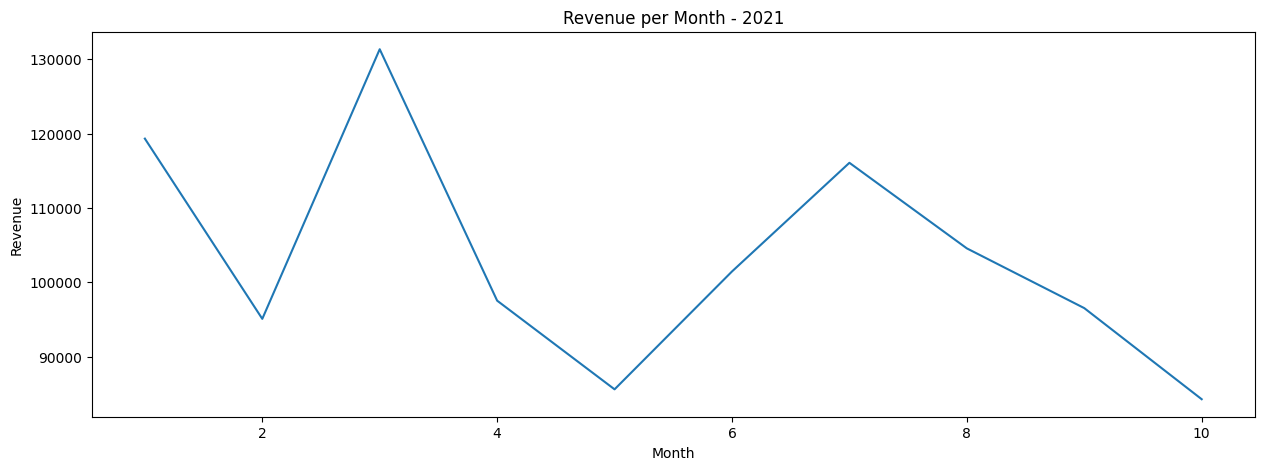

In [44]:
plt.figure(figsize=(15,5))
plt.plot(sales_2021.index, sales_2021.values)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Revenue per Month - 2021')
plt.show()

### Comments
* More than 120.000 revenue in March
* Slowdown in sales in October (which could lead to low sales at the end of the year and festive season)
* February, May and October with revenue below 100.000





##Which product categories have the highest revenue?

In [45]:
product_type = general_df[['product_type' , 'total_price']].groupby('product_type').total_price.sum().sort_values(ascending=False)
product_type

product_type
Jacket      357026.0
Trousers    341174.0
Shirt       333600.0
Name: total_price, dtype: float64

<BarContainer object of 3 artists>

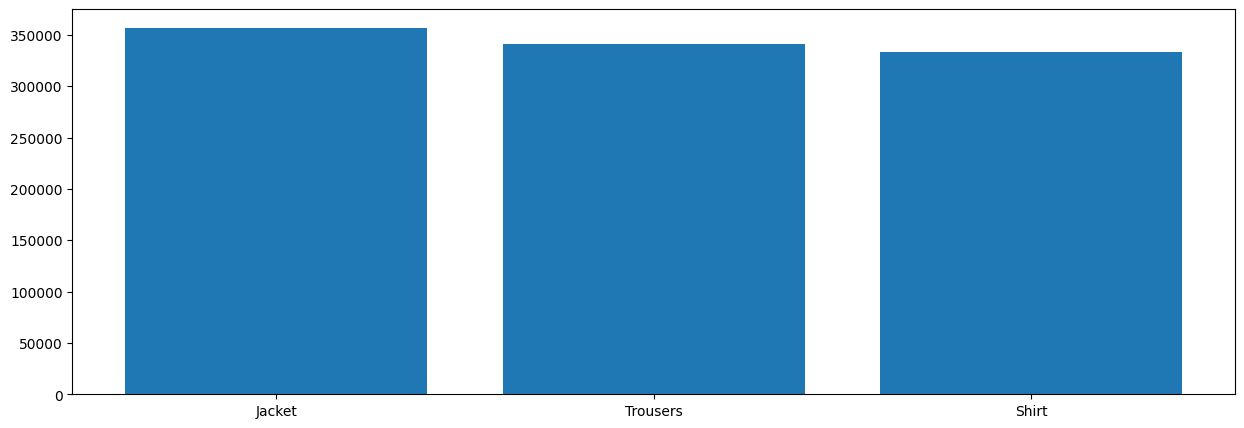

In [46]:
plt.figure(figsize=(15,5))
plt.bar(product_type.index , product_type.values)

###Comments:
* All 3 types of Trend products have similar recipes when analyzed by type.

### What are the products that **BEST SELL** and are our "champions"? And which products SELL LESS so we can boost them.

In [47]:
best_sellers = general_df[['product_name' , 'product_type', 'total_price']].groupby('product_name').total_price.sum().sort_values(ascending=False)

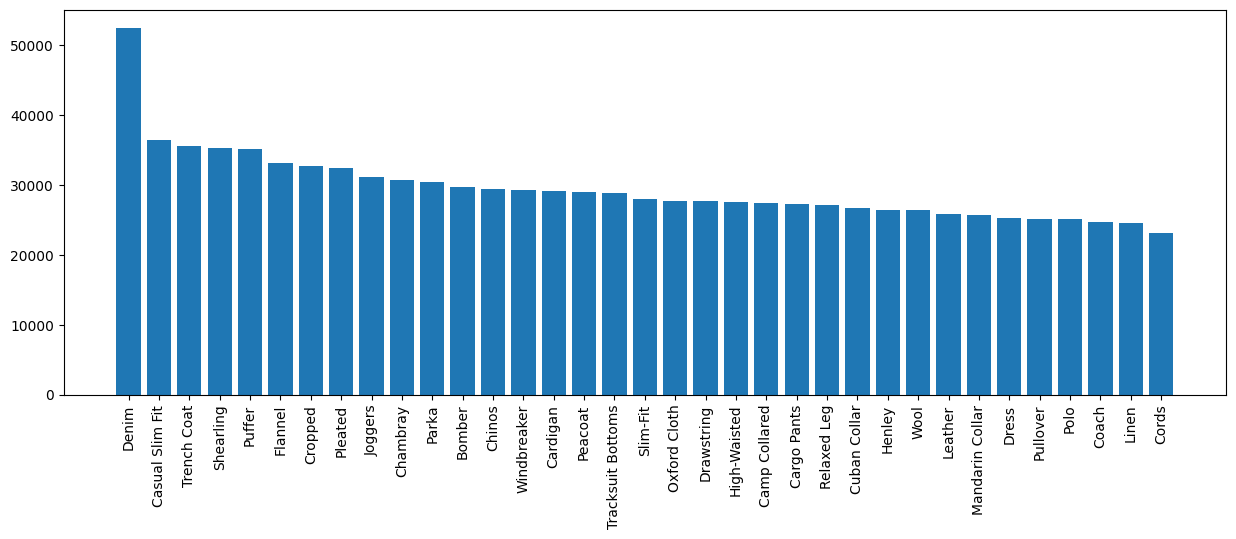

In [48]:
#When analyzing the result, we can see that the product "Denim" stands out from the others, being an outlier in this query.
plt.figure(figsize=(15,5))
plt.bar(best_sellers.index , best_sellers.values)
plt.xticks(rotation=90)
plt.show()

In [49]:
#In a more in-depth analysis, we separated the products by type and name. In this, we noticed that the product "Demin" has 2 types and the combined revenue of the two types made it an outlier. Now we have the result of total revenue by product and type.
best_sellers = general_df[['product_name', 'product_type', 'total_price']].groupby(['product_name', 'product_type']).total_price.sum().reset_index().sort_values(by='total_price', ascending=False)
best_sellers

,product_name,product_type,total_price
4,Casual Slim Fit,Shirt,36414.0
33,Trench Coat,Jacket,35581.0
30,Shearling,Jacket,35334.0
27,Puffer,Jacket,35164.0
15,Flannel,Shirt,33158.0
9,Cropped,Trousers,32660.0
25,Pleated,Trousers,32340.0
18,Joggers,Trousers,31062.0
5,Chambray,Shirt,30740.0
23,Parka,Jacket,30397.0


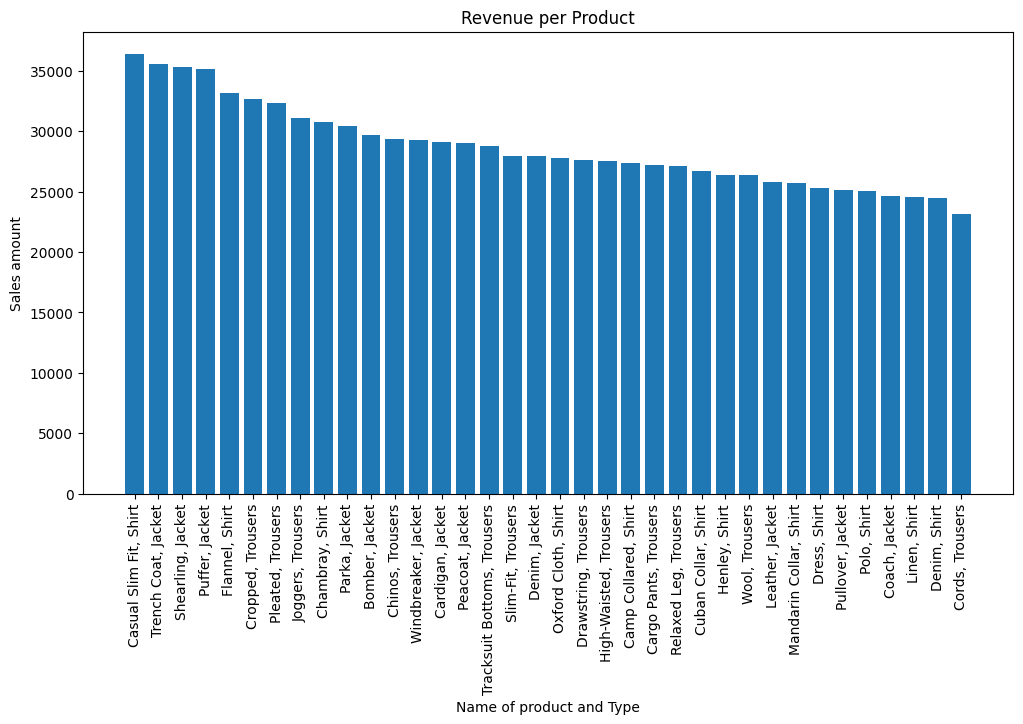

In [50]:
plt.figure(figsize=(12, 6))
plt.bar(x=best_sellers['product_name'] + ', ' + best_sellers['product_type'], height=best_sellers['total_price'])
plt.title('Revenue per Product')
plt.xlabel('Name of product and Type')
plt.ylabel('Sales amount')
plt.xticks(rotation=90)
plt.show()

###Comments:
* 4 products stand out in generating revenue. Turning over 35,000 in the year
* "Cords, Trousers" is the worst product when it comes to revenue generation, earning less than 25,000 in the year.
* Other products are between 25,000 and 35,000 in revenue generation per year.

##Which products are best sold in quantity?

In [51]:
quantity_product = general_df[['product_name' , 'product_type' , 'quantity']].groupby(['product_name', 'product_type']).quantity.sum().reset_index().sort_values(by='quantity', ascending=False)
quantity_product

,product_name,product_type,quantity
18,Joggers,Trousers,334
25,Pleated,Trousers,308
4,Casual Slim Fit,Shirt,306
30,Shearling,Jacket,302
29,Relaxed Leg,Trousers,301
33,Trench Coat,Jacket,299
27,Puffer,Jacket,298
0,Bomber,Jacket,297
5,Chambray,Shirt,290
22,Oxford Cloth,Shirt,289


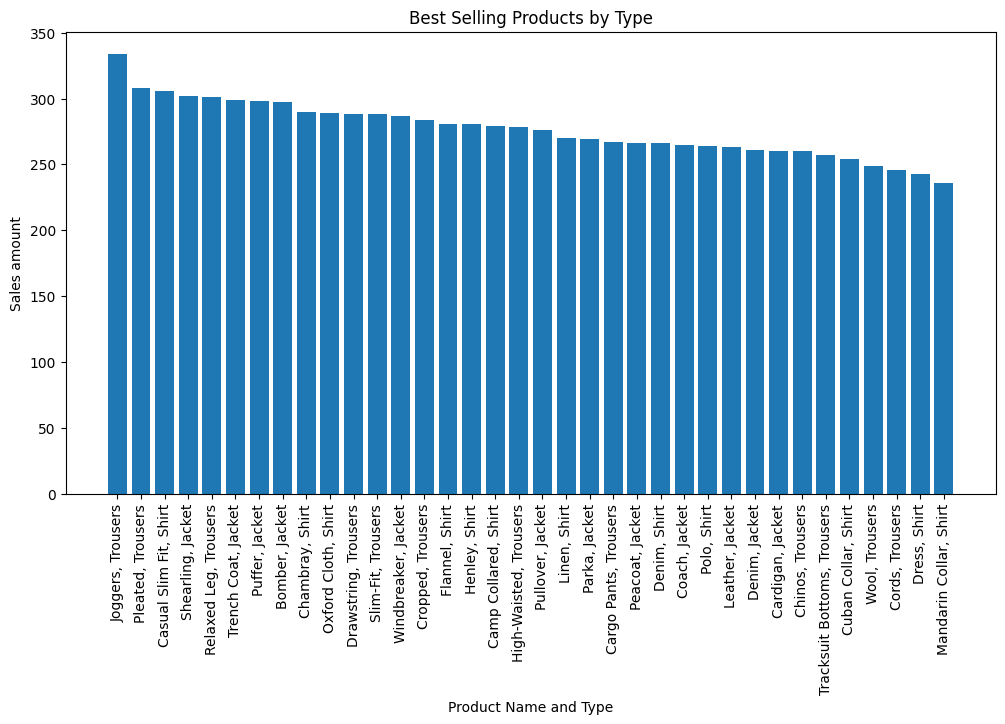

In [52]:
plt.figure(figsize=(12, 6))
plt.bar(x=quantity_product['product_name'] + ', ' + quantity_product['product_type'], height=quantity_product['quantity'])
plt.title('Best Selling Products by Type')
plt.xlabel('Product Name and Type')
plt.ylabel('Sales amount')
plt.xticks(rotation=90)
plt.show()

#Who are the main customers in terms of purchases? Is there a pattern of recurring purchases from some customers?

###Top 10 customers by overall revenue and quantity

In [53]:
top_customer = general_df[['customer_name', 'total_price', 'quantity']].groupby('customer_name').sum([['total_price', 'quantity']]).sort_values(by='total_price', ascending=False).head(10)

In [54]:
top_customer = general_df[['customer_name', 'total_price', 'quantity']].groupby('customer_name').sum().sort_values(by='total_price', ascending=False).head(10)
top_customer['avg_ticket'] = top_customer['total_price'] / top_customer['quantity']
top_customer

,total_price,quantity,avg_ticket
customer_name,,,
Wren Helgass,7632.0,74,103.135135
Kristofor Roos,6640.0,64,103.750000
Dannie Fidler,6341.0,59,107.474576
Esteban Hensmans,5657.0,53,106.735849
Crin Johnikin,5581.0,54,103.351852
Melissa Partkya,5435.0,52,104.519231
Thorny Nornable,5119.0,50,102.380000
Saul Franklyn,4969.0,48,103.520833
Mallory Castellani,4807.0,48,100.145833


##Impact of revenue from top 10 customers on revenue in 2021

In [55]:
total_top_customer = top_customer['total_price'].sum()
impact_top_cutomers = (total_top_customer * 100) / total_sales
print(f'The top 10 best customers represent {impact_top_cutomers:.2f}% of our revenue in 2021')

The top 10 best customers represent 5.49% of our revenue in 2021


##Sales by state


In [56]:
revenue_state = general_df[['state', 'total_price']].groupby('state').total_price.sum().sort_values(ascending=False)
revenue_state

state
South Australia                 147816.0
Queensland                      142062.0
New South Wales                 131744.0
Australian Capital Territory    130442.0
Western Australia               125430.0
Tasmania                        122095.0
Victoria                        120357.0
Northern Territory              111854.0
Name: total_price, dtype: float64

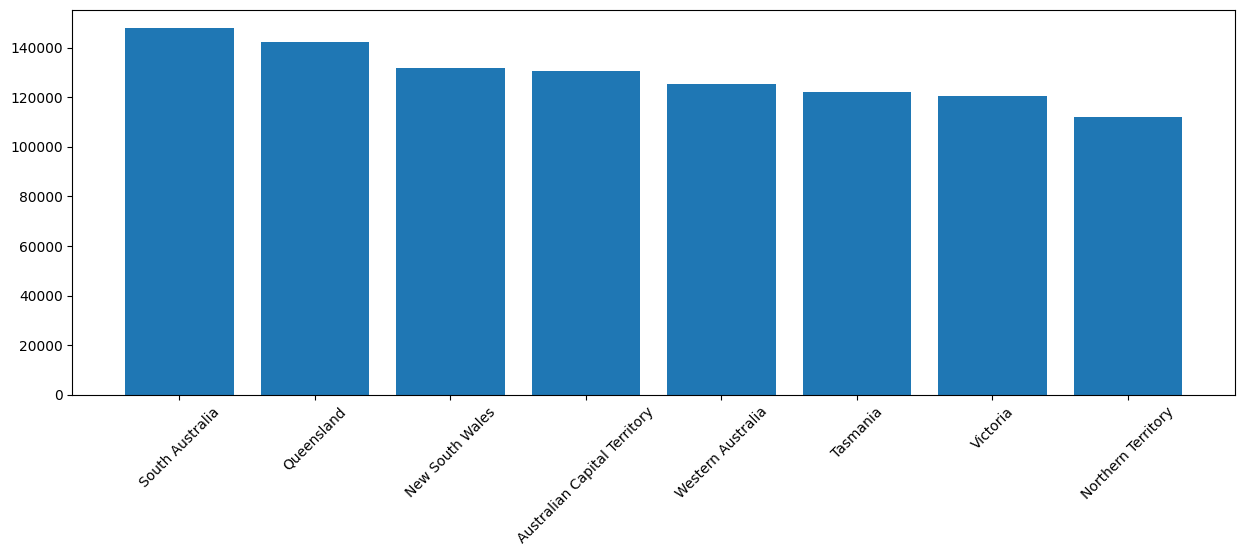

In [57]:
plt.figure(figsize=(15,5))
plt.bar(revenue_state.index , revenue_state.values)
plt.xticks(rotation=45)
plt.show()

#Sales by gender

In [58]:
gender_revenue = general_df[['gender', 'total_price']].groupby('gender').total_price.sum().sort_values(ascending=False)
gender_revenue

gender
Female         145404.0
Genderfluid    142077.0
Male           138988.0
Polygender     132548.0
Genderqueer    132389.0
Non-binary     126201.0
Agender        107179.0
Bigender       107014.0
Name: total_price, dtype: float64

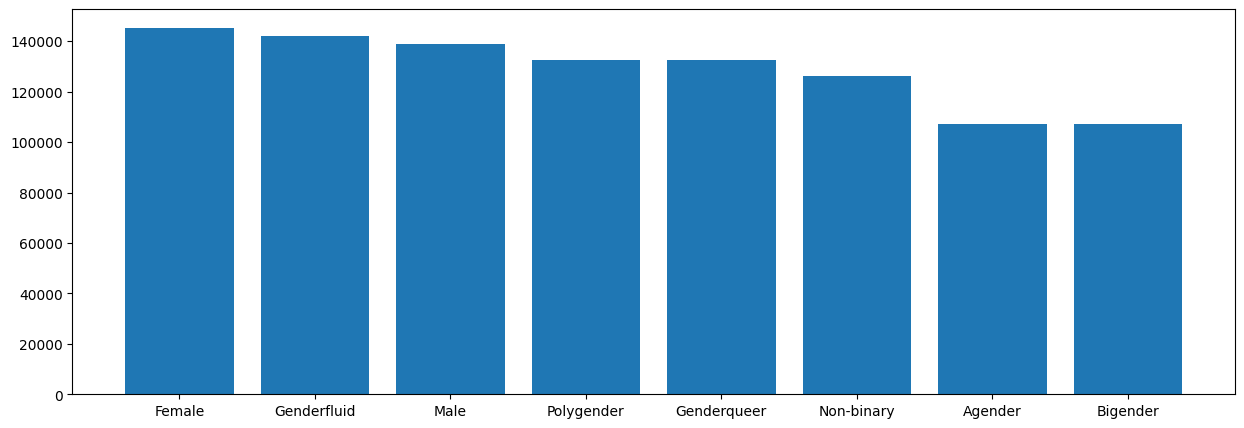

In [59]:
plt.figure(figsize=(15,5))
plt.bar(gender_revenue.index , gender_revenue.values)
plt.show()

##How many products on average did customers buy in 2021?


In [65]:
avg_qtd = general_df['quantity'].mean()
print(f'Customers bought {avg_qtd:.1f} products on average in 2021')

Customers bought 2.0 products on average in 2021


##Average age of our customers

In [61]:
avg_age = customer_df['age'].mean()
print(f'The average age of our customers in 2021 was {avg_age:.1f} years')

The average age of our customers in 2021 was 49.9 years


##Average delivery time

In [62]:
general_df['delivery_time'] = (general_df.delivery_date - general_df.order_date).dt.days
avg_dly_time = general_df['delivery_time'].mean()
print(f'Average delivery time is {avg_dly_time:.1f} days')

Average delivery time is 14.0 days


##Sales by size

In [63]:
general_df[['size' , 'quantity']].groupby('size').quantity.sum().sort_values(ascending=False)

size
M     2036
L     1998
S     1992
XS    1990
XL    1946
Name: quantity, dtype: int64

##Sales by color

In [64]:
general_df[['colour' , 'total_price']].groupby('colour').total_price.sum().sort_values(ascending=False)

colour
blue      158220.0
violet    149960.0
indigo    149439.0
red       145898.0
yellow    144168.0
green     143358.0
orange    140757.0
Name: total_price, dtype: float64

#Action proposal
* Opportunity for campaigns to boost sales at the end of the year.
* Continue investing in the LGBTQIA+ public as they are a large part of our revenue. Perhaps with specific campaigns.
* Trying to invest in logistics to reduce the average delivery time, which is one of our competitive differentiators.
* Aim for revenue greater than 100,000
* Increase the quantity per custumer

#Persona

* Women aged around 48 who live in large centers in Australia (South Australia or Queensland)
* LGBTQIA+ people aged around 48 who live in large centers in Australia  (South Australia or Queensland).